In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Label Encoding and Preprocessing

In [2]:
# Label Encoding
data = pd.read_csv("bank-additional-full.csv", sep=';')
data = data.drop('duration',axis=1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


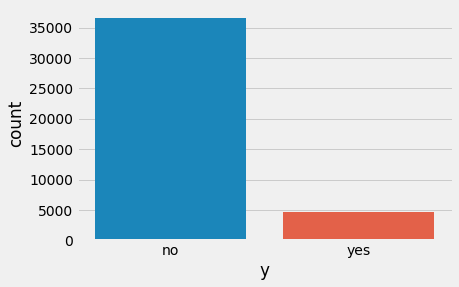

In [27]:
# Data is imbalanced for predictor variable y

sns.countplot(x='y',data=data)

In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [21]:
# Number of duplicate values
print(f"Number of clients: {data.shape[0]}")
print(f"Number of variables: {data.shape[1]} incl. target")
print(f"Number of duplicate entries: {data.duplicated().sum()}")

Number of clients: 41188
Number of variables: 21 incl. target
Number of duplicate entries: 1793


# Smote Technique to make data balanced balanced

In [31]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (51160, 20)
After OverSampling, the shape of train_y: (51160,) 

After OverSampling, counts of label '1': 25580
After OverSampling, counts of label '0': 25580


In [6]:
categorical_columns = data.drop('y', axis=1).select_dtypes(include=['object']).columns

# Visualizing the data for clear understanding

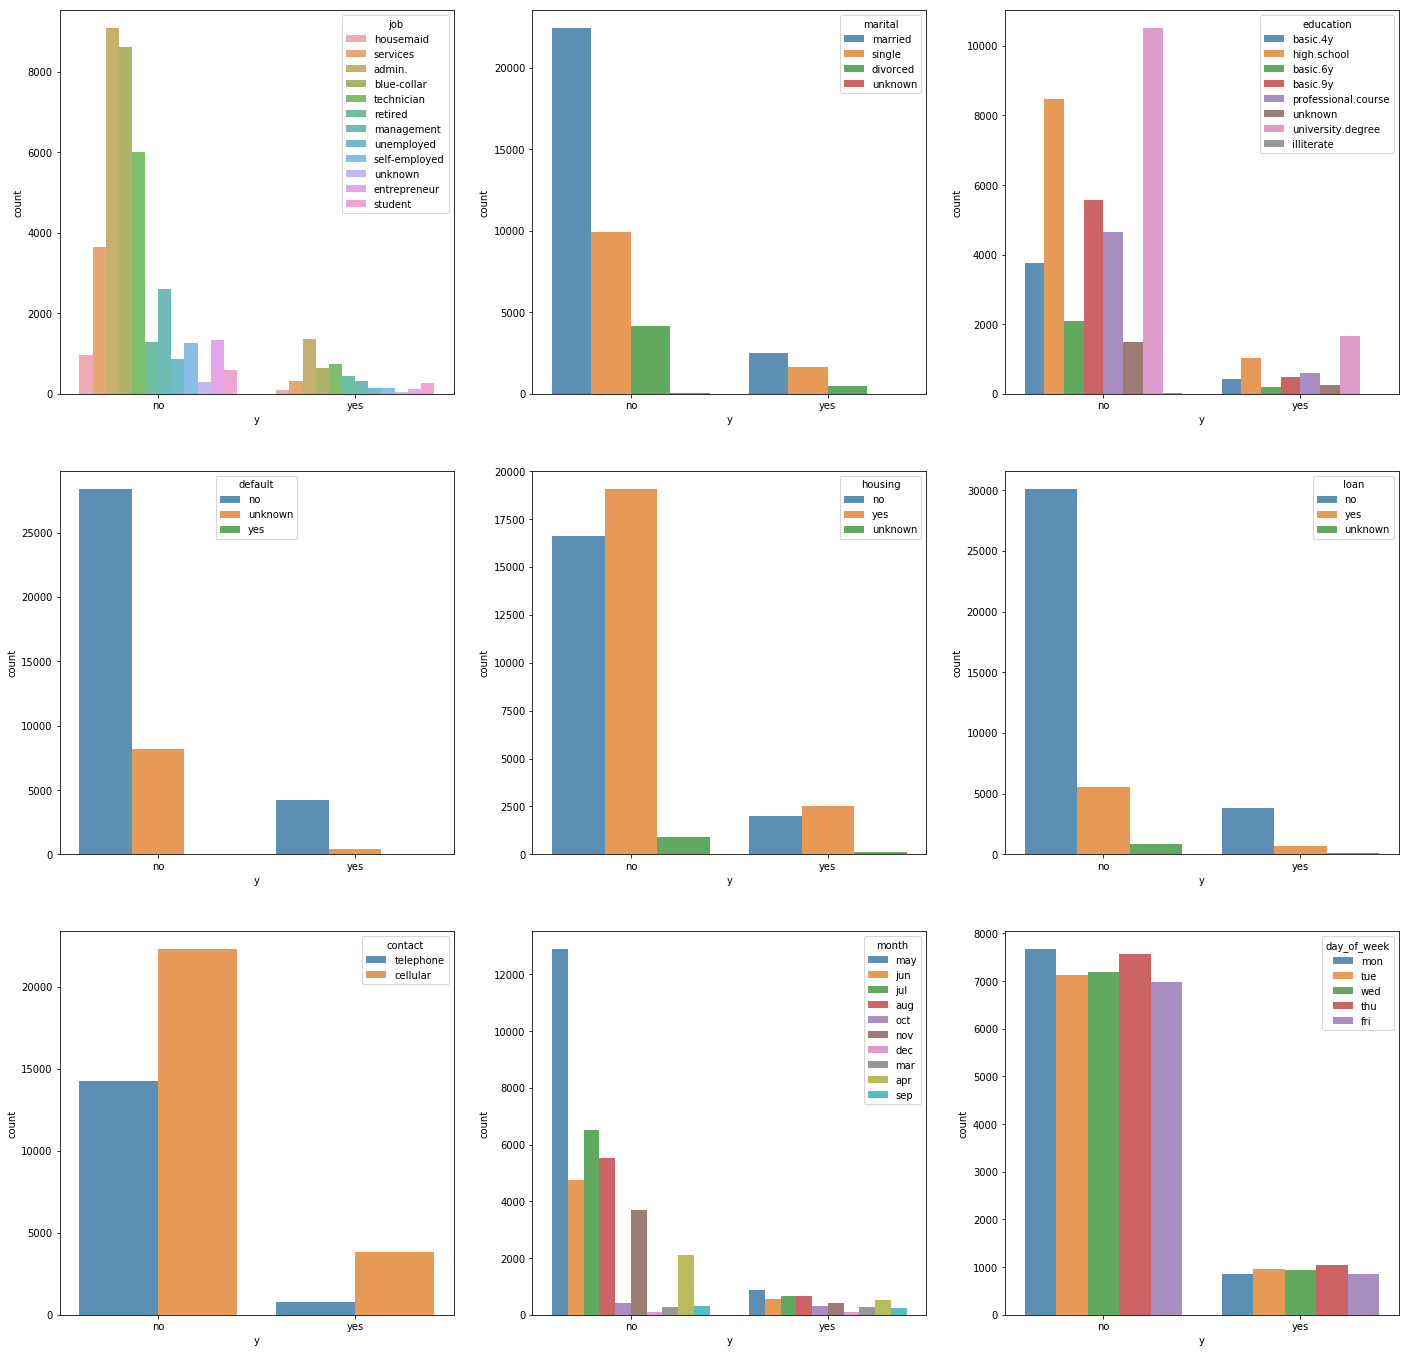

In [9]:
new_cat_list = []
for idx in range(4):
    new_cat_list.append(categorical_columns[3*idx: 3*idx+3])

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,24))
for i in range(3):
    for j in range(3):
        sns.countplot(x='y', hue=new_cat_list[i][j], data=data, ax=axs[i,j], alpha=.8)
plt.show()

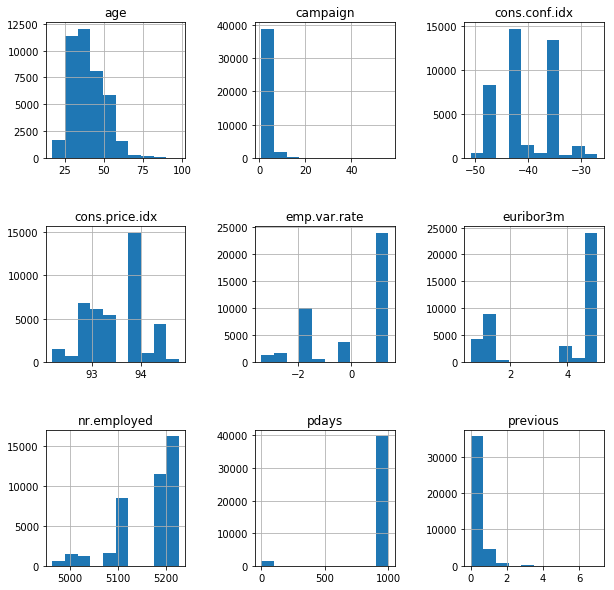

In [10]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [3]:
# Scaling the data using standard scalar
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no


In [5]:
#Number of unique values in each column
for col in data.columns:
    if data[col].nunique() < 20:
        print('=======================================')
        print(col)
        print('---------------------------------------')
        print(round(1e2*data[col].value_counts()/len(data),2))



job
---------------------------------------
admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64
marital
---------------------------------------
married     60.52
single      28.09
divorced    11.20
unknown      0.19
Name: marital, dtype: float64
education
---------------------------------------
university.degree      29.54
high.school            23.10
basic.9y               14.68
professional.course    12.73
basic.4y               10.14
basic.6y                5.56
unknown                 4.20
illiterate              0.04
Name: education, dtype: float64
default
---------------------------------------
no         79.12
unknown    20.87
yes         0.01
Name: default, dtype: float64
housing
---------------------------------------
yes        52

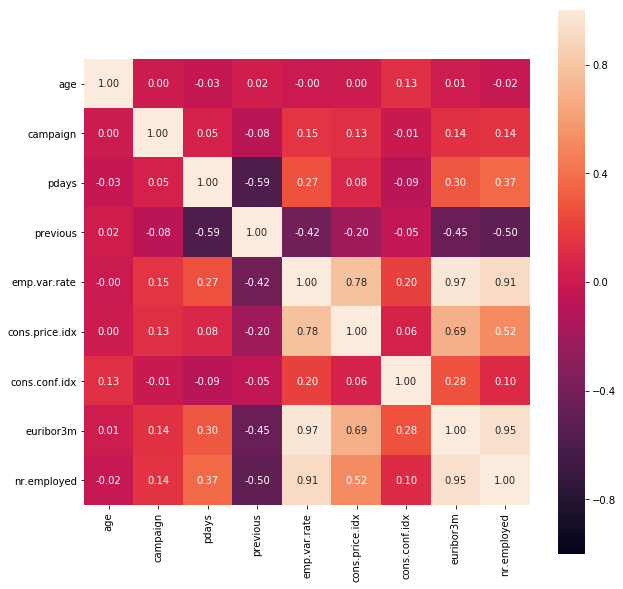

In [18]:
#Heat Map
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f', vmax=1, vmin=-1);

In [6]:
#Hot code encoding the data
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,1


In [7]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [8]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,1,1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
1,0.493827,0,1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
2,0.246914,1,-1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
3,0.283951,1,1,1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0
4,0.481481,1,1,-1,0.0,1,0.0,0,0.9375,0.698753,...,0,1,0,0,0,0,1,0,0,0


In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn import impute
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [23]:
#data = pd.read_csv("bank-additional-full.csv", sep=';')

In [10]:
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [11]:
num_feat = data.drop('y', axis=1).select_dtypes(include=np.number).columns
cat_feat = data.drop('y', axis=1).select_dtypes(include=['object']).columns
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Outlier Detection

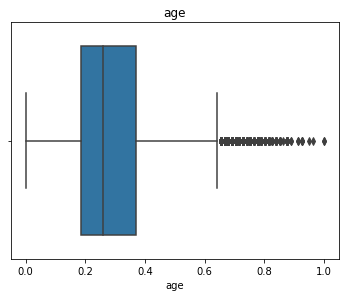

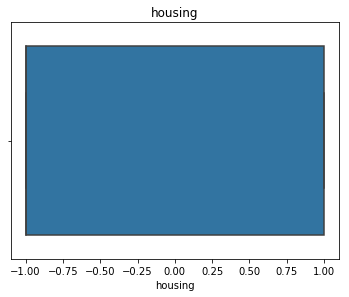

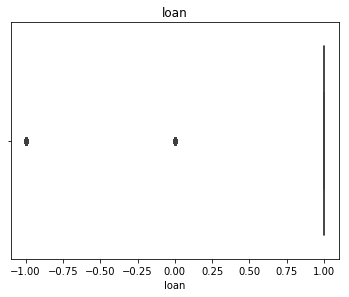

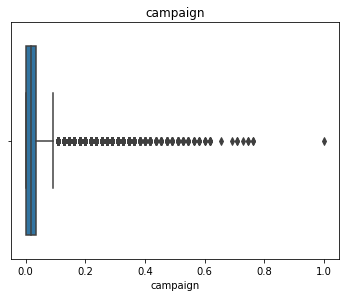

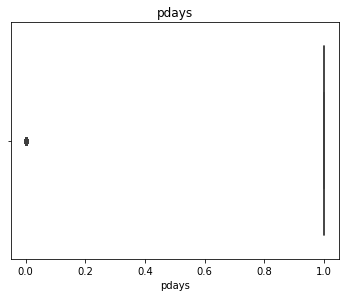

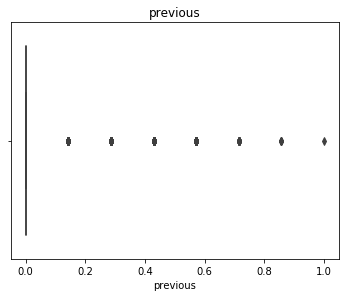

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['education']=le.fit_transform(data['education'])
data['poutcome']=le.fit_transform(data['poutcome'])
col=data[['age','housing','loan','campaign','pdays','previous']]
for i in col:
    n=1
    plt.figure(figsize=(20,20))
    plt.subplot(4,3,1)
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()
    n=n+1

# Data Skewness 

In [29]:
# creating a dataframe
import scipy
stats_age = {'Designation': ['Value'],
             'Variable': 'age',
             'Description': 'clients` age',
             'Type of variable': data.age.dtype,
             'Type of distribution': 'continuous',
             'Total observations': data.age.shape[0],
             'Missing values': data.age.isnull().sum(),
             'Unique values': data.age.nunique(),
             'Min': data.age.min(),
             '25%': int(data.age.quantile(q=[.25]).iloc[-1]),
             'Median': data.age.median(),
             '75%': int(data.age.quantile(q=[.75]).iloc[-1]),
             'Max': data.age.max(),
             'Mean': data.age.mean(),
             'Std dev': data.age.std(),
             'Variance': data.age.var(),
             'Skewness': scipy.stats.skew(data.age),
             'Kurtosis': scipy.stats.kurtosis(data.age)
            }
st_age = pd.DataFrame(stats_age, columns = ['Designation',
                                          'Variable',
                                          'Description',
                                          'Type of variable',
                                          'Type of distribution',
                                          'Total observations',
                                          'Missing values',
                                          'Unique values',
                                          'Min',
                                          '25%',
                                          'Median',
                                          '75%',
                                          'Max',
                                          'Mean',
                                          'Std dev',
                                          'Variance',
                                          'Skewness',
                                          'Kurtosis'
                                             ])
st_age.set_index("Designation", inplace=True)
results = st_age.T # transposing the dataframe
resultsT = st_age
display(results)

Designation,Value
Variable,age
Description,clients` age
Type of variable,float64
Type of distribution,continuous
Total observations,41188
Missing values,0
Unique values,78
Min,0
25%,0
Median,0.259259


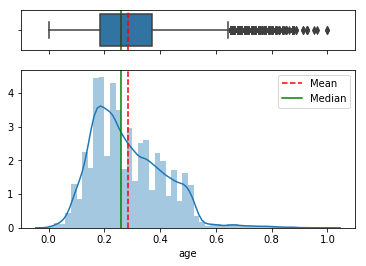

In [38]:
# Visualization of 'age'
# creating a distribution graph and bloxplot combinedage = df.age
np.array(data['age']).mean()
np.median(data['age'])
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(data['age']).mean()
median=np.median(data['age'])
sns.boxplot(data['age'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
sns.distplot(data['age'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

In [41]:
display(data.age.quantile(q=[.01, .05, .95, .99]))

0.01    0.074074
0.05    0.111111
0.95    0.506173
0.99    0.666667
Name: age, dtype: float64

# Logistic Regression

In [25]:
from time import time
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis, 
                                           QuadraticDiscriminantAnalysis) 
from sklearn.linear_model import (LogisticRegression, RidgeClassifier, 
                                  SGDClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier)
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
#from sklearn.impute import SimpleImputer

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
#Label Encoding
#data balancing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

In [14]:
X = data.drop('y', axis=1).values
y = data['y'].values

In [15]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
#Apply for different polynomial features
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [17]:
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)

In [18]:
#Logistic Regression
#Metrics to calculate accuracy,precision,recall score and F1 score
#Apply for different polynomial features
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)



In [21]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

In [22]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

In [23]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.899409,0.899086,0.896901
1,Precision,0.197264,0.221742,0.146868
2,Recall,0.681592,0.649789,0.696246
3,F1 Score,0.305974,0.330649,0.242568


# Model evaluation after appliying PCA
# Observation : To capture 90% of variance we need only 24 Features out of 56

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
data.dropna(inplace=True)
x_pca = pca.fit_transform(X)
x_pca.shape

(41188, 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)

In [33]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)

In [50]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [35]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

In [36]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

In [37]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

,Metric,Logistic Regression with Linear Features,Logistic Regression with Features of Degree=2,Logistic Regression with Features of Degree=3
0,Accuracy,0.891640,0.890912,0.890507
1,Precision,0.174226,0.143988,0.093593
2,Recall,0.557604,0.557103,0.580357
3,F1 Score,0.265496,0.228833,0.161190


# Plotting the ROC Curve for better visualization

In [51]:
logisticRegr = LogisticRegression()
poly_features_2 = PolynomialFeatures(degree=2)
X_poly2 = poly_features_2.fit_transform(X_train)
logisticRegr.fit(X_poly2, y_train)
predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
#data['predict'] = predict
TP2 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN2 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP2 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN2 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P2 = np.sum(y_test)
N2 = len(y_test) - P2
phat2 = logisticRegr.predict_proba(poly_features_2.fit_transform(X_test))[:,1]

In [52]:
logisticRegr = LogisticRegression()
poly_features_1 = PolynomialFeatures(degree=1)
X_poly1 = poly_features_1.fit_transform(X_train)
logisticRegr.fit(X_poly1, y_train)
predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
#data['predict'] = predict
TP1 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN1 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP1 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN1 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P1 = np.sum(y_test)
N1 = len(y_test) - P1
phat1 = logisticRegr.predict_proba(poly_features_1.fit_transform(X_test))[:,1]

In [53]:
logisticRegr = LogisticRegression()
poly_features_3 = PolynomialFeatures(degree=3)
X_poly3 = poly_features_3.fit_transform(X_train)
logisticRegr.fit(X_poly3, y_train)
predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
#data['predict'] = predict
TP3 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN3 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP3 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN3 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P3 = np.sum(y_test)
N3 = len(y_test) - P3
phat3 = logisticRegr.predict_proba(poly_features_3.fit_transform(X_test))[:,1]

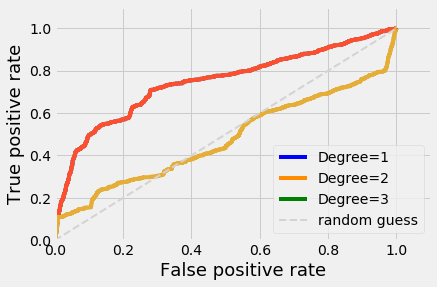

In [54]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, phat1)
plt.plot(fpr1, tpr1)
plt.plot(FP1/N1, TP1/P1, label = 'Degree=1', color='blue')

fpr2, tpr2, thresholds2 = roc_curve(y_test, phat2)
plt.plot(fpr2, tpr2)
plt.plot(FP2/N2, TP2/P2, label = 'Degree=2', color='darkorange')

fpr3, tpr3, thresholds3 = roc_curve(y_test, phat3)
plt.plot(fpr3, tpr3)
plt.plot(FP3/N3, TP3/P3, label = 'Degree=3', color='green')

x = np.linspace(0,1,num=50)
plt.plot(x,x,color='lightgrey',linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()

# Random Forest Classifier

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# raw data
#data balancing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
X = data.drop('y', axis=1).values
y = data['y'].values
X.shape,y.shape

((41188, 19), (41188,))

In [60]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [61]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
predict = rfc.predict(x_test)

In [63]:
acc = accuracy_score(predict, y_test)
pre = precision_score(predict, y_test)
rec = recall_score(predict, y_test)
f1 = f1_score(predict, y_test)

In [64]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [acc, pre, rec, f1]
    })
table

,Metric,Score
0,Accuracy,0.891883
1,Precision,0.290857
2,Recall,0.535099
3,F1 Score,0.376866


In [65]:
#undestanding Feature Importance with Random Classifier
X = data.drop('y', axis=1).values
y = data['y'].values
pp=data.drop('y', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [66]:
feature_importances

,importance
age,0.183684
euribor3m,0.137425
campaign,0.084139
job,0.083791
education,0.073967
day_of_week,0.061034
nr.employed,0.060873
pdays,0.044649
marital,0.040756
housing,0.037117


# SVM Classifier

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [18]:
# raw data
#data = pd.read_csv("bank-additional-full.csv", sep=';')
#data = data.drop('duration',axis=1)
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
X = data.drop('y', axis=1).values
y = data['y'].values

In [19]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [15]:

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='precision')

In [16]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'kernel': 'linear'}
This model produces a mean cross-validated score (precision) of 0.6468751668783775


In [17]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, clf.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)

precision on the evaluation set:  0.6197478991596639
recall on the evaluation set:  0.21238300935925125
accuracy on the evaluation set:  0.8968196164117505


In [29]:
acc1 = accuracy_score(y_true, y_pred)

In [30]:
from sklearn.decomposition import PCA
# raw data
X = data.drop('y', axis=1).values
y = data['y'].values
# split, random_state is used for repeatable results, you should remove it if you are running your own code.
pca = PCA(n_components=0.9)
x_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)
x_pca.shape

(41188, 1)